# AI_HW01. Bayesian Classfier
## 201604148 이지현

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
mean1 = [0,1]
cov1 = [[1,0],[0,1]]

mean2 = [1,-1]
cov2 = [[-1,0],[0,1]]

In [3]:
x1 = np.random.multivariate_normal(mean1, cov1, 500)
x2 = np.random.multivariate_normal(mean2, cov2, 500)

In [4]:
y1 = np.ones(500)
y2 = -1*np.ones(500)

In [5]:
print(x1.shape)
print(x2.shape)
print(y1.shape)
print(y2.shape)

(500, 2)
(500, 2)
(500,)
(500,)


**각각 만들어진 두 class의 데이터를 합침**

In [6]:
datax = np.concatenate((x1,x2), axis=0)
datay = np.concatenate((y1,y2), axis=0)

In [7]:
print(datax.shape)
print(datay.shape)

(1000, 2)
(1000,)


**그림으로 잘 만들어졌는지 확인**

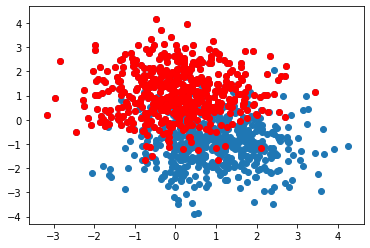

In [8]:
plt.scatter(datax[:,0], datax[:,1])
plt.scatter(x1[:,0], x1[:,1], c="red")

## Requirement 1. Data를 train:test로 분할한다.

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(datax, datay, test_size=0.3, random_state=0)

print("X_train size: {}".format(X_train.shape))
print("y_train size: {}".format(y_train.shape))
print("X_test size: {}".format(X_test.shape))
print("y_test size: {}".format(y_test.shape))

X_train size: (700, 2)
y_train size: (700,)
X_test size: (300, 2)
y_test size: (300,)


## Requirement 2. Sklearn의 GaussinNB 함수를 이용해서 Classifier A를 만든다.

In [10]:
from sklearn.naive_bayes import GaussianNB

clf_A = GaussianNB()
clf_A.fit(X_train, y_train)
tsty_hat = clf_A.predict(X_test)
print(tsty_hat)

[-1. -1.  1.  1. -1. -1.  1.  1.  1. -1.  1. -1. -1.  1. -1.  1. -1.  1.
 -1.  1. -1.  1.  1. -1. -1.  1.  1.  1. -1.  1. -1. -1. -1.  1.  1. -1.
  1.  1. -1.  1.  1. -1. -1.  1.  1. -1. -1. -1.  1. -1.  1.  1.  1.  1.
 -1. -1.  1.  1. -1.  1. -1. -1.  1.  1.  1.  1.  1. -1.  1. -1. -1.  1.
 -1.  1. -1.  1.  1. -1. -1. -1. -1.  1.  1. -1. -1. -1.  1. -1.  1. -1.
  1.  1. -1.  1. -1.  1. -1.  1.  1. -1. -1. -1.  1. -1.  1. -1. -1. -1.
 -1.  1.  1. -1.  1. -1.  1.  1. -1.  1.  1. -1.  1. -1.  1. -1.  1. -1.
  1.  1. -1. -1.  1. -1. -1.  1. -1. -1.  1.  1. -1.  1.  1. -1. -1.  1.
  1. -1. -1.  1.  1.  1. -1.  1.  1.  1. -1. -1.  1.  1. -1.  1. -1. -1.
 -1. -1. -1.  1.  1. -1.  1.  1. -1. -1.  1. -1.  1. -1.  1. -1. -1. -1.
 -1. -1.  1.  1. -1. -1. -1.  1. -1.  1. -1. -1.  1.  1. -1. -1. -1.  1.
  1.  1. -1. -1.  1.  1.  1. -1.  1. -1. -1. -1. -1. -1.  1. -1.  1. -1.
 -1.  1.  1. -1. -1. -1. -1.  1.  1.  1. -1. -1.  1.  1. -1.  1. -1. -1.
  1. -1. -1.  1. -1.  1. -1.  1.  1.  1. -1.  1.  1

## Requirement 3
## Sklearn의 GaussinNB 함수를 이용해서 Classifier B를 만든다.
**Prior가 추가된 NB**

In [11]:
clf_B = GaussianNB(priors=[0.3, 0.7])
clf_B.fit(X_train, y_train)
tsty_hat2 = clf_B.predict(X_test)

## Requirement 4
## A와 B의 test data에 대한 accuracy를 계산해서 비교한다.

** A의 Accuracy **

In [12]:
dif = y_test - tsty_hat
accuracy = 1 - (np.size(np.where(dif != 0))/np.size(y_test))
print(accuracy)

0.8966666666666667


** B의 Accuracy **

In [13]:
dif = y_test - tsty_hat2
accuracy = 1 - (np.size(np.where(dif != 0))/np.size(y_test))
print(accuracy)

0.8866666666666667


## Reqirement 5 
## A와 B의 test data에 대한 실제 label 및 모델의 예측 결과를 그림으로 표현한다.

** A의 예측결과 **

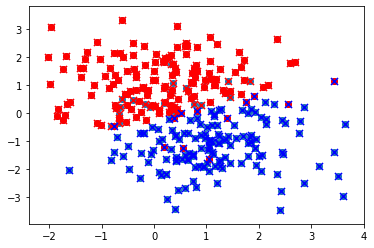

In [14]:
plt.scatter(X_test[:,0], X_test[:,1])
plt.scatter(X_test[np.where(y_test==1),0], X_test[np.where(y_test==1),1], c="red")
plt.scatter(X_test[np.where(tsty_hat==1),0], X_test[np.where(tsty_hat==1),1], c="red", marker='x', s=50)
plt.scatter(X_test[np.where(tsty_hat==-1),0], X_test[np.where(tsty_hat==-1),1], c="blue", marker='x',s=50)

** B의 예측결과 **

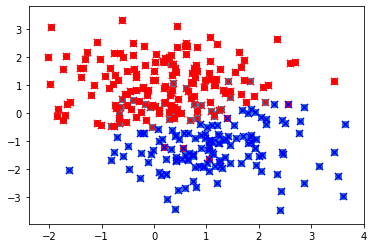

In [15]:
plt.scatter(X_test[:,0], X_test[:,1])
plt.scatter(X_test[np.where(y_test==1),0], X_test[np.where(y_test==1),1], c="red")
plt.scatter(X_test[np.where(tsty_hat2==1),0], X_test[np.where(tsty_hat2==1),1], c="red", marker='x', s=50)
plt.scatter(X_test[np.where(tsty_hat2==-1),0], X_test[np.where(tsty_hat2==-1),1], c="blue", marker='x',s=50)